In [1]:
using CSV
using DataFrames

In [2]:
#Mô tả tập dữ liệu thu thập được phục vụ bài toán:

#Tên Dataset: Data_Patient.csv
#File dữ liệu chứa thông tin của 300 bệnh nhân bị bệnh đau ngực
#Mỗi dòng ứng với thông tin của một bệnh nhân, bao gồm 9 thuộc tính:
#id: Mã của bệnh nhân (object)
#Age: Tuổi của bệnh nhân (số)
#Gender: Giới tính của bệnh nhân (chuỗi: Male – Female)
#Type: Cho biết loại triệu chứng đau ngực mà bệnh nhân này mắc phải, với 4 giá trị: (Typical angina, Atypical angina, Non-anginal pain, Asymptomatic)
#Blood_pressure: Huyết áp của bệnh nhân – đơn vị: mmhg (số)
#Cholesterol(mỡ máu): Chỉ số cholesterol của bệnh nhân – đơn vị: mg/dl (số)
#Heatbeat: Thông số nhịp tim của bệnh nhân – đơn vị: lần/phút (số)
#Thalassemia(bệnh tán máu bẩm sinh): Chỉ số Thalassemia của bệnh nhân chỉ gồm 3 giá trị (3: Bình thường | 4: Khiếm khuyết cố định | 7: Kiếm khuyết có thể đảo ngược)
#Result: Cho biết bệnh nhân có bị bệnh tim hay không? (0: Không bị bệnh tim mạch | 1: Bị bệnh tim mạch)

In [3]:
df = CSV.read("Data_Patient.csv",DataFrame)

,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat
,String15,Int64,String7,String31?,Int64,Int64,Int64
1,Patient_01,63,Male,Typical angina,145,233,150
2,Patient_02,67,Male,Asymptomatic,160,286,108
3,Patient_03,67,Male,Asymptomatic,120,229,129
4,Patient_04,37,Male,Non-anginal pain,130,250,187
5,Patient_05,41,Female,Atypical angina,130,204,172
6,Patient_16,56,Male,Atypical angina,120,236,178
7,Patient_07,62,Female,Asymptomatic,140,268,160
8,Patient_08,57,Female,Asymptomatic,120,354,163
9,Patient_19,63,Male,Asymptomatic,130,254,147


In [4]:
println(df)

300×9 DataFrame
 Row │ id           Age    Gender   Type              Blood_pressure  Cholesterol  Heartbeat  Thalassemia  Result 
     │ String15     Int64  String7  String31?         Int64           Int64        Int64      Int64?       Int64  
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Patient_01      63  Male     Typical angina               145          233        150            6       0
   2 │ Patient_02      67  Male     Asymptomatic                 160          286        108            3       1
   3 │ Patient_03      67  Male     Asymptomatic                 120          229        129            7       1
   4 │ Patient_04      37  Male     Non-anginal pain             130          250        187            3       0
   5 │ Patient_05      41  Female   Atypical angina              130          204        172      missing       0
   6 │ Patient_16      56  Male     Atypical angina              120 

 300 │ Patient_300     57  Male     Asymptomatic                 130          131        115            7       1


In [5]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,id,,Patient_01,,Patient_99,0,String15
2,Age,54.49,29,56.0,77,0,Int64
3,Gender,,Female,,Male,0,String7
4,Type,,Asymptomatic,,Typical angina,5,"Union{Missing, String31}"
5,Blood_pressure,131.687,94,130.0,200,0,Int64
6,Cholesterol,247.07,126,242.5,564,0,Int64
7,Heartbeat,149.563,71,152.5,202,0,Int64
8,Thalassemia,4.78157,3,3.0,7,7,"Union{Missing, Int64}"
9,Result,0.46,0,0.0,1,0,Int64


In [6]:
names(df)

9-element Vector{String}:
 "id"
 "Age"
 "Gender"
 "Type"
 "Blood_pressure"
 "Cholesterol"
 "Heartbeat"
 "Thalassemia"
 "Result"

In [7]:
using Plots
#thống kê số người mắc bệnh tim
kq =combine(groupby(df,:Result),nrow => :count)
#----------------------------------------------

,Result,count
,Int64,Int64
1,0,162
2,1,138


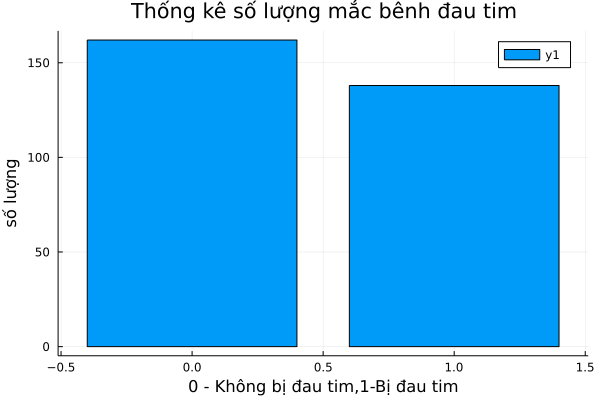

In [8]:
#trực quan hóa kết quả
bar(kq[!,:Result],kq[!,:count],title = "Thống kê số lượng mắc bệnh đau tim",
    xlabel = "0 - Không bị đau tim,1-Bị đau tim",
    ylabel = "số lượng",)


In [9]:
#thống kê giới tính 
gender =combine(groupby(df,:Gender),nrow => :quantity)

,Gender,quantity
,String7,Int64
1,Male,205
2,Female,95


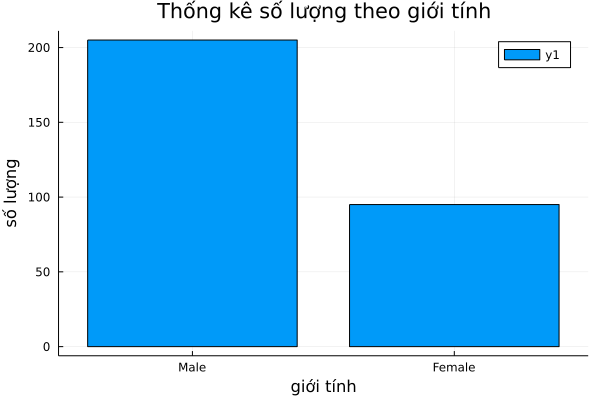

In [10]:
#trực quan hóa
bar(gender[!,:Gender],gender[!,:quantity],title = "Thống kê số lượng theo giới tính",
    xlabel = "giới tính",
    ylabel = "số lượng",)

In [11]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,id,,Patient_01,,Patient_99,0,String15
2,Age,54.49,29,56.0,77,0,Int64
3,Gender,,Female,,Male,0,String7
4,Type,,Asymptomatic,,Typical angina,5,"Union{Missing, String31}"
5,Blood_pressure,131.687,94,130.0,200,0,Int64
6,Cholesterol,247.07,126,242.5,564,0,Int64
7,Heartbeat,149.563,71,152.5,202,0,Int64
8,Thalassemia,4.78157,3,3.0,7,7,"Union{Missing, Int64}"
9,Result,0.46,0,0.0,1,0,Int64


In [12]:
names(df)

9-element Vector{String}:
 "id"
 "Age"
 "Gender"
 "Type"
 "Blood_pressure"
 "Cholesterol"
 "Heartbeat"
 "Thalassemia"
 "Result"

In [13]:
df_Type =combine(groupby(df,:Type),nrow => :quantity)

,Type,quantity
,String31?,Int64
1,missing,5
2,Typical angina,23
3,Asymptomatic,139
4,Non-anginal pain,84
5,Atypical angina,49


In [14]:
df_Thalassemia =combine(groupby(df,:Thalassemia),nrow => :quantity)

,Thalassemia,quantity
,Int64?,Int64
1,3,158
2,6,18
3,7,117
4,missing,7


In [15]:
#treatment data missing
df.Type=coalesce.(df.Type,"Asymptomatic")
df.Thalassemia=coalesce.(df.Thalassemia,3)
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,id,,Patient_01,,Patient_99,0,String15
2,Age,54.49,29,56.0,77,0,Int64
3,Gender,,Female,,Male,0,String7
4,Type,,Asymptomatic,,Typical angina,0,AbstractString
5,Blood_pressure,131.687,94,130.0,200,0,Int64
6,Cholesterol,247.07,126,242.5,564,0,Int64
7,Heartbeat,149.563,71,152.5,202,0,Int64
8,Thalassemia,4.74,3,3.0,7,0,Int64
9,Result,0.46,0,0.0,1,0,Int64


In [16]:

df.Gender=replace(df.Gender,"e"=>0)
df.Type=replace(df.Type,"TypicaFemale"=>1)
df.Gender=replace(df.Gender,"Mall angina"=>1)
df.Type=replace(df.Type,"Asymptomatic"=>2)
df.Type=replace(df.Type,"Non-anginal pain"=>3)
df.Type=replace(df.Type,"Atypical angina"=>4)
df

,id,Age,Gender,Type,Blood_pressure,Cholesterol,Heartbeat,Thalassemia
,String15,Int64,Any,Any,Int64,Int64,Int64,Int64
1,Patient_01,63,0,1,145,233,150,6
2,Patient_02,67,0,2,160,286,108,3
3,Patient_03,67,0,2,120,229,129,7
4,Patient_04,37,0,3,130,250,187,3
5,Patient_05,41,1,4,130,204,172,3
6,Patient_16,56,0,4,120,236,178,3
7,Patient_07,62,1,2,140,268,160,3
8,Patient_08,57,1,2,120,354,163,3
9,Patient_19,63,0,2,130,254,147,7


In [17]:
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,id,,Patient_01,,Patient_99,0,String15
2,Age,54.49,29,56.0,77,0,Int64
3,Gender,0.316667,0,0.0,1,0,Any
4,Type,2.53,1,2.0,4,0,Any
5,Blood_pressure,131.687,94,130.0,200,0,Int64
6,Cholesterol,247.07,126,242.5,564,0,Int64
7,Heartbeat,149.563,71,152.5,202,0,Int64
8,Thalassemia,4.74,3,3.0,7,0,Int64
9,Result,0.46,0,0.0,1,0,Int64


In [18]:
#convert any=>int or column gender
df.Gender=convert.(Int64,df.Gender)
#conver any=>int or column type
df.Type=convert.(Int64,df.Type)
describe(df)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,id,,Patient_01,,Patient_99,0,String15
2,Age,54.49,29,56.0,77,0,Int64
3,Gender,0.316667,0,0.0,1,0,Int64
4,Type,2.53,1,2.0,4,0,Int64
5,Blood_pressure,131.687,94,130.0,200,0,Int64
6,Cholesterol,247.07,126,242.5,564,0,Int64
7,Heartbeat,149.563,71,152.5,202,0,Int64
8,Thalassemia,4.74,3,3.0,7,0,Int64
9,Result,0.46,0,0.0,1,0,Int64


In [19]:
names(df)

9-element Vector{String}:
 "id"
 "Age"
 "Gender"
 "Type"
 "Blood_pressure"
 "Cholesterol"
 "Heartbeat"
 "Thalassemia"
 "Result"

In [20]:
print(df)

300×9 DataFrame
 Row │ id           Age    Gender  Type   Blood_pressure  Cholesterol  Heartbeat  Thalassemia  Result 
     │ String15     Int64  Int64   Int64  Int64           Int64        Int64      Int64        Int64  
─────┼────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Patient_01      63       0      1             145          233        150            6       0
   2 │ Patient_02      67       0      2             160          286        108            3       1
   3 │ Patient_03      67       0      2             120          229        129            7       1
   4 │ Patient_04      37       0      3             130          250        187            3       0
   5 │ Patient_05      41       1      4             130          204        172            3       0
   6 │ Patient_16      56       0      4             120          236        178            3       0
   7 │ Patient_07      62       1      2             140       

In [21]:
df_new =Array(df[:,2:9])

300×8 Matrix{Int64}:
 63  0  1  145  233  150  6  0
 67  0  2  160  286  108  3  1
 67  0  2  120  229  129  7  1
 37  0  3  130  250  187  3  0
 41  1  4  130  204  172  3  0
 56  0  4  120  236  178  3  0
 62  1  2  140  268  160  3  1
 57  1  2  120  354  163  3  0
 63  0  2  130  254  147  7  1
 53  0  2  140  203  155  7  1
 57  0  2  140  192  148  6  0
 56  1  4  140  294  153  3  0
 56  0  3  130  256  142  6  1
  ⋮                    ⋮     
 56  0  4  120  240  169  3  0
 67  0  3  152  212  150  7  1
 55  1  4  132  342  166  3  0
 44  0  2  120  169  144  6  1
 63  0  2  140  187  144  7  1
 63  1  2  124  197  136  3  1
 41  0  4  120  157  182  3  0
 59  0  2  164  176   90  6  1
 57  1  2  140  241  123  7  1
 45  0  1  110  264  132  7  1
 68  0  2  144  193  141  7  1
 57  0  2  130  131  115  7  1

In [33]:
train,test = partition(df_new, 0.8, shuffle=true)

([46 0 … 7 1; 55 1 … 3 0; … ; 67 0 … 7 1; 58 0 … 3 1], [44 0 … 3 0; 55 0 … 3 0; … ; 64 1 … 3 0; 49 0 … 7 1])

In [34]:
X_train=train[:,1:7]
X_train=float.(X_train)

240×7 Matrix{Float64}:
 46.0  0.0  2.0  140.0  311.0  120.0  7.0
 55.0  1.0  4.0  135.0  250.0  161.0  3.0
 58.0  0.0  2.0  150.0  270.0  111.0  7.0
 64.0  0.0  3.0  125.0  309.0  131.0  7.0
 51.0  0.0  2.0  140.0  299.0  173.0  7.0
 66.0  1.0  3.0  146.0  278.0  152.0  3.0
 40.0  0.0  2.0  152.0  223.0  181.0  7.0
 59.0  0.0  2.0  140.0  177.0  162.0  7.0
 55.0  0.0  2.0  160.0  289.0  145.0  7.0
 58.0  0.0  3.0  140.0  211.0  165.0  3.0
 62.0  1.0  2.0  150.0  244.0  154.0  3.0
 54.0  1.0  3.0  108.0  267.0  167.0  3.0
 45.0  1.0  4.0  130.0  234.0  175.0  3.0
  ⋮                              ⋮    
 65.0  1.0  2.0  150.0  225.0  114.0  7.0
 45.0  0.0  2.0  142.0  309.0  147.0  7.0
 51.0  1.0  2.0  130.0  305.0  142.0  7.0
 56.0  0.0  4.0  130.0  221.0  163.0  7.0
 52.0  0.0  4.0  120.0  325.0  172.0  3.0
 66.0  0.0  4.0  160.0  246.0  120.0  6.0
 40.0  0.0  1.0  140.0  199.0  178.0  7.0
 56.0  0.0  4.0  120.0  236.0  178.0  3.0
 50.0  1.0  4.0  120.0  244.0  162.0  3.0
 74.0  1.0  4.

In [35]:
Y_train=train[:,:8]

240-element Vector{Int64}:
 1
 0
 1
 1
 1
 0
 1
 1
 1
 0
 1
 0
 0
 ⋮
 1
 1
 1
 0
 0
 1
 0
 0
 0
 0
 1
 1

In [36]:
X_test=test[:,1:7]
x=float.(X_test)

60×7 Matrix{Float64}:
 44.0  0.0  3.0  140.0  235.0  180.0  3.0
 55.0  0.0  4.0  130.0  262.0  155.0  3.0
 50.0  0.0  3.0  129.0  196.0  163.0  3.0
 57.0  0.0  3.0  150.0  126.0  173.0  7.0
 67.0  0.0  2.0  120.0  229.0  129.0  7.0
 48.0  0.0  2.0  130.0  256.0  150.0  7.0
 46.0  0.0  4.0  101.0  197.0  156.0  7.0
 54.0  1.0  3.0  135.0  304.0  170.0  3.0
 54.0  0.0  2.0  122.0  286.0  116.0  3.0
 59.0  0.0  1.0  134.0  204.0  162.0  3.0
 50.0  0.0  3.0  140.0  233.0  163.0  7.0
 53.0  0.0  3.0  130.0  246.0  173.0  3.0
 63.0  0.0  2.0  140.0  187.0  144.0  7.0
  ⋮                              ⋮    
 57.0  0.0  2.0  110.0  201.0  126.0  6.0
 41.0  0.0  4.0  120.0  157.0  182.0  3.0
 62.0  1.0  3.0  130.0  263.0   97.0  7.0
 60.0  0.0  3.0  140.0  185.0  155.0  3.0
 52.0  1.0  3.0  136.0  196.0  169.0  3.0
 65.0  0.0  2.0  135.0  254.0  127.0  7.0
 49.0  1.0  2.0  130.0  269.0  163.0  3.0
 65.0  0.0  2.0  120.0  177.0  140.0  7.0
 50.0  1.0  3.0  120.0  219.0  158.0  3.0
 52.0  0.0  1.0

In [37]:
Y_test=test[:,8]
y=Array(Y_test')

1×60 Matrix{Int64}:
 0  0  0  0  1  1  0  0  1  1  1  0  1  …  0  0  1  1  0  1  0  0  0  0  0  1

In [38]:
#using Pkg
#Pkg.add("JLD")
#Pkg.add("NearestNeighborModels")
#Pkg.add("MLJ")
using NearestNeighbors
using NearestNeighborModels
using MLJ

In [39]:
KNNClassifier= @load KNNClassifier verbosity=0
KNNClassifier()

KNNClassifier(
    K = 5,
    algorithm = :kdtree,
    metric = Euclidean(0.0),
    leafsize = 10,
    reorder = true,
    weights = Uniform())

In [40]:
clf = KNNClassifier(K=9, weights=NearestNeighborModels.Inverse())
mach = machine(clf,X_train,categorical(Y_train))
model=MLJ.fit!(mach,verbosity=0)

┌ Warning: The scitype of `X`, in `machine(model, X, ...)` is incompatible with `model=KNNClassifier`:
│ scitype(X) = AbstractMatrix{Continuous}
│ input_scitype(model) = Table{var"#s53"} where var"#s53"<:(AbstractVector{var"#s52"} where var"#s52"<:Continuous).
└ @ MLJBase C:\Users\Chinh\.julia\packages\MLJBase\QXObv\src\machines.jl:133


Machine{KNNClassifier,…} trained 1 time; caches data
  args: 
    1:	Source @388 ⏎ `AbstractMatrix{Continuous}`
    2:	Source @167 ⏎ `AbstractVector{Multiclass{2}}`


In [44]:
#dự đoán bệnh nhân : đầu vào là 1 matrix dữ liệu của 1 bệnh nhân : 0 là không mắc bệnh , 1 là  mắc bệnh
#[62 0 4 120 281 103 7]=>bị bệnh tim
#[40 1 4 110 190 165 3]=>không bị bệnh tim
model=predict(mach,  [40 1 4 110 190 165 3])

1-element MLJBase.UnivariateFiniteVector{Multiclass{2}, Int64, UInt32, Float64}:
 UnivariateFinite{Multiclass{2}}(0=>0.657, 1=>0.343)

In [45]:
Z = reshape(pdf.(model,0))
Z=convert.(Float64,Z)
if (Z >=0.5)
    println("ML says: Thật tuyệt vời, Bạn không bị bệnh đau tim!^.^")
else
    println("ML says: Thôi xong rồi, Bạn có khả năng bị bệnh đau tim!-_-")
end

ML says: Thật tuyệt vời, Bạn không bị bệnh đau tim!^.^


In [43]:
#using ScikitLearn.CrossValidation: cross_val_score
using ScikitLearn
@sk_import metrics: accuracy_score 
y_pred=predict(mach,x)
#cross_val_score(mach,x,y,cv=1, n_jobs=0, verbose=0)
#accuracy_score(y_pred,Y_test)

60-element MLJBase.UnivariateFiniteVector{Multiclass{2}, Int64, UInt32, Float64}:
 UnivariateFinite{Multiclass{2}}(0=>0.914, 1=>0.0863)
 UnivariateFinite{Multiclass{2}}(0=>0.68, 1=>0.32)
 UnivariateFinite{Multiclass{2}}(0=>0.773, 1=>0.227)
 UnivariateFinite{Multiclass{2}}(0=>0.474, 1=>0.526)
 UnivariateFinite{Multiclass{2}}(0=>0.299, 1=>0.701)
 UnivariateFinite{Multiclass{2}}(0=>0.528, 1=>0.472)
 UnivariateFinite{Multiclass{2}}(0=>0.794, 1=>0.206)
 UnivariateFinite{Multiclass{2}}(0=>0.475, 1=>0.525)
 UnivariateFinite{Multiclass{2}}(0=>0.187, 1=>0.813)
 UnivariateFinite{Multiclass{2}}(0=>0.709, 1=>0.291)
 UnivariateFinite{Multiclass{2}}(0=>0.917, 1=>0.0828)
 UnivariateFinite{Multiclass{2}}(0=>1.0, 1=>0.0)
 UnivariateFinite{Multiclass{2}}(0=>0.474, 1=>0.526)
 ⋮
 UnivariateFinite{Multiclass{2}}(0=>0.419, 1=>0.581)
 UnivariateFinite{Multiclass{2}}(0=>0.695, 1=>0.305)
 UnivariateFinite{Multiclass{2}}(0=>0.218, 1=>0.782)
 UnivariateFinite{Multiclass{2}}(0=>0.569, 1=>0.431)
 UnivariateFinite{